In [72]:
%matplotlib inline
%config IPython.matplotlib.backend = "retina"
import matplotlib.pyplot as plt
from matplotlib import rcParams
rcParams["figure.dpi"] = 150
rcParams["savefig.dpi"] = 150

In [73]:
import numpy as np
import scipy.special as sps
from scipy.stats import nakagami

In [74]:
omega=1.

In [75]:
h = nakagami.rvs(nu=4., size=10000)

In [76]:
def loglikelihood(m):
    return -(len(h) * (m *(np.log(m) - np.log(omega)) - np.log(sps.gamma(m)))
            - m *(np.sum(h ** 2) / omega - 2 * np.sum(np.log(h))))

In [77]:
def surrogate(m, m_t):
    return (-len(h) * (m * np.log(m_t) + 2 *(m - m_t) - m * np.log(omega)
                      -np.log(sps.gamma(m_t)) + (m_t - .5)*np.log(m_t - 1)
                      -.5*np.log(m - 1) - (m - 1.)*(np.log(m_t - 1) + (m - 1)/(m_t - 1) - 1))
            +m *(np.sum(h ** 2) / omega - 2 * np.sum(np.log(h))))

In [78]:
m = np.linspace(1.01, 12., 100)

In [79]:
ll = loglikelihood(m)

In [83]:
m_t = 2.

In [84]:
sur = surrogate(m, m_t) 

(0, 20000)

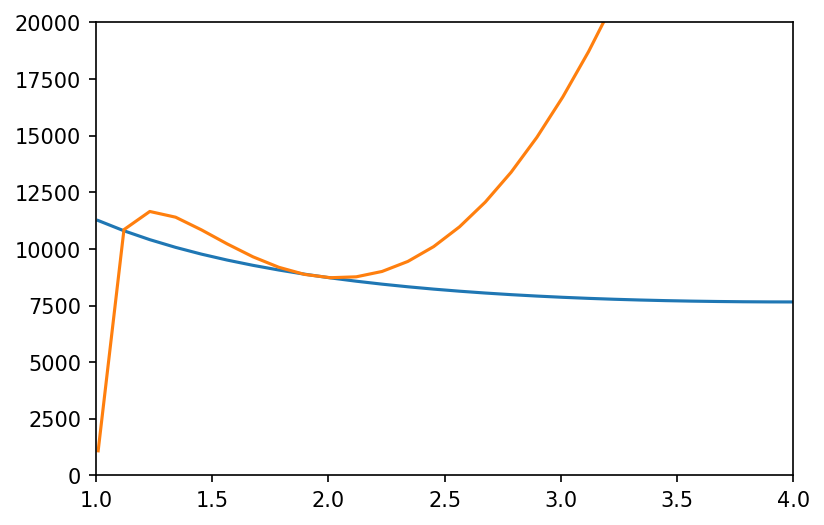

In [89]:
plt.plot(m, ll)
plt.plot(m, sur)
plt.xlim(1., 4.)
plt.ylim(0, 20000)